In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import time


import seaborn as sns
sns.set_style("whitegrid")

from scipy.spatial.distance import jensenshannon

import urllib3
import json

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Update data from nomis

In [2]:
df = pd.read_csv('../../data/testing/nomis/hh_size.csv', index_col=0)

In [3]:
boroughs = ['City of London', 'Westminster', 'Kingston upon Thames', 'Bromley', 'Greenwich', 'Havering', 'Barnet', 'Enfield', 'Hillingdon', 'Brent']

In [4]:
dct = {}

for b in boroughs:
    dct[b] = df[b].values

In [5]:
idx = ['Total', '1', '2', '3', '4', '5', '6', '7', '8+']

In [6]:
df = pd.DataFrame(dct, index=idx)

In [7]:
df.to_csv('../../data/testing_select/nomis/hh_size.csv')

# Compute values for synthetic data

In [8]:
boroughs = ['City of London', 'Westminster', 'Kingston upon Thames', 'Bromley', 'Greenwich', 'Havering', 'Barnet', 'Enfield', 'Hillingdon', 'Brent']
idx = ['Total', '1', '2', '3', '4', '5', '6', '7', '8+']

In [9]:
# ciDATGAN
dct = {}

for b in boroughs:
    df = pd.read_csv('../../data/ciDATGAN_select/{}.csv'.format(b))

    vals = []
    vals.append(np.sum(1/df['hh_people']))
    for i in range(1, 8):
        vals.append(np.sum(1/df[df['hh_people'] == i]['hh_people']))
    vals.append(np.sum(1/df[df['hh_people'] >= 8]['hh_people']))

    dct[b] = vals

In [10]:
df = pd.DataFrame(dct, index=idx)
df.to_csv('../../data/testing_select/ciDATGAN/hh_size.csv')

In [11]:
# DATGAN
dct = {}

for b in boroughs:
    df = pd.read_csv('../../data/DATGAN_select/{}.csv'.format(b))

    vals = []
    vals.append(np.sum(1/df['hh_people']))
    for i in range(1, 8):
        vals.append(np.sum(1/df[df['hh_people'] == i]['hh_people']))
    vals.append(np.sum(1/df[df['hh_people'] >= 8]['hh_people']))

    dct[b] = vals

In [12]:
df = pd.DataFrame(dct, index=idx)
df.to_csv('../../data/testing_select/DATGAN/hh_size.csv')

In [13]:
# oversample
dct = {}

for b in boroughs:
    df = pd.read_csv('../../data/oversample/{}.csv'.format(b))

    vals = []
    vals.append(np.sum(1/df['hh_people']))
    for i in range(1, 8):
        vals.append(np.sum(1/df[df['hh_people'] == i]['hh_people']))
    vals.append(np.sum(1/df[df['hh_people'] >= 8]['hh_people']))

    dct[b] = vals

In [14]:
df = pd.DataFrame(dct, index=idx)
df.to_csv('../../data/testing_select/oversample/hh_size.csv')

# Compare

In [27]:
orig = pd.read_csv('../../data/testing_select/nomis/hh_size.csv', index_col=0)

In [28]:
files = [
    '../../data/testing_select/DATGAN/hh_size.csv',
    '../../data/testing_select/ciDATGAN/hh_size.csv',
    '../../data/testing_select/oversample/hh_size.csv'
]

dfs = [pd.read_csv(f, index_col=0) for f in files]
labels = ['DATGAN', 'ciDATGAN', 'Oversample LTDS']

In [29]:
orig = orig/orig.iloc[0]
orig = orig.iloc[1:-1]

errors = {}

for (df, l) in zip(dfs, labels):
    df = df/df.iloc[0]
    df = df.iloc[1:-1]

    errors[l] = []

    for c in orig.columns:
        errors[l].append(jensenshannon(df[c], orig[c]))

In [30]:
for l in labels:
    print('{}: {:.2e} \pm {:.2e}'.format(l, np.mean(errors[l]), np.std(errors[l])))

DATGAN: 5.94e-02 \pm 2.13e-02
ciDATGAN: 6.38e-02 \pm 4.32e-02
Oversample LTDS: 6.21e-02 \pm 3.49e-02


<AxesSubplot:>

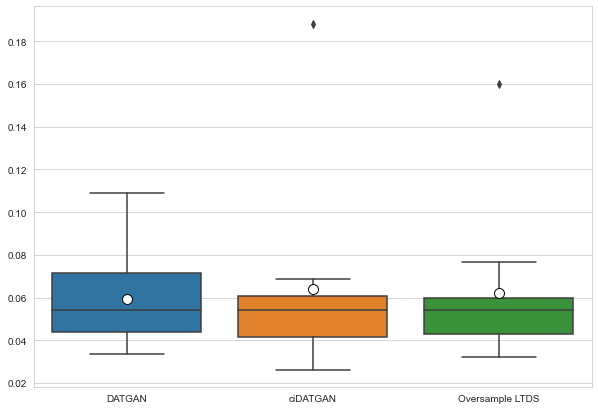

In [31]:
df = pd.DataFrame(errors)

plt.figure(figsize=(10,7))

sns.boxplot(data=df,showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"})

In [32]:
df.values

array([[0.10896281, 0.18826708, 0.16000496],
       [0.04911919, 0.03829456, 0.05811446],
       [0.05752197, 0.05435497, 0.0604463 ],
       [0.05121399, 0.05221604, 0.055871  ],
       [0.07452886, 0.05511319, 0.05230066],
       [0.04216732, 0.06872116, 0.07647091],
       [0.03346262, 0.02634648, 0.03209593],
       [0.03867245, 0.03774445, 0.04065203],
       [0.06308586, 0.05436825, 0.04969332],
       [0.07545791, 0.06280984, 0.03554225]])